In [ ]:
!pip install openai embedchain serpapi google-search-results matplotlib gradio=="3.45.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
!pip install flask_ngrok pyngrok flask

In [ ]:
!pip install selenium fuzzywuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 39.0 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvi

# Dependencies

In [ ]:
import pandas as pd
from embedchain import App
import matplotlib.pyplot as plt
from serpapi.google_search import GoogleSearch

# Importing dependancies
import re
import os
import yaml
import json
from openai import OpenAI
from fuzzywuzzy import fuzz

import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Constants

In [ ]:
SERP_API = ""
OPENAI_API_KEY=""
PRODUCT = "Iphone 14 Pro Max"

# Google Trends

In [ ]:
def plot_google_trends(product, SERP_API):
    params = {
        "api_key": SERP_API,
        "engine": "google_trends",
        "q": product
    }

    search = GoogleSearch(params)
    results = search.get_dict()

    # Extracting data from JSON
    dates = [item['date'] for item in results['interest_over_time']['timeline_data']]
    values = [int(item['values'][0]['value']) for item in results['interest_over_time']['timeline_data']]

    # Creating a DataFrame
    df = pd.DataFrame({'Date': dates, 'Value': values})

    # Plotting the data
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Value'], marker='o')
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Search Interest')
    plt.title(f'Google Trends for "{product}" (Last Year)')
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    # Return the latest value
    latest_value = values[-1]
    return latest_value

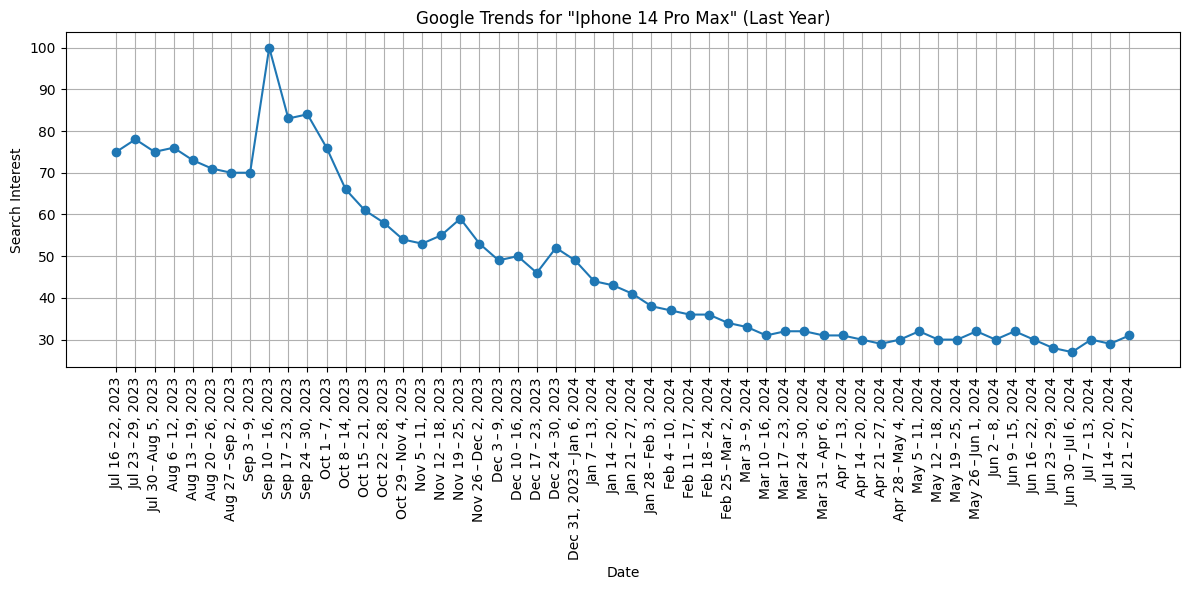

Demand value for 'Iphone 14 Pro Max' is: 31


In [ ]:
demand_value = plot_google_trends(PRODUCT, SERP_API)
print(f"Demand value for '{PRODUCT}' is: {demand_value}")

# News articles

In [ ]:
# Function to fetch the top 5 news links
def fetch_top_news_links(product, api_key, location="India", top_n=5):
    params = {
        "q": product,
        "tbm": "nws",
        "location": location,
        "api_key": api_key
    }

    # Perform the search
    search = GoogleSearch(params)
    results = search.get_dict()

    # Get the news results
    news_results = results.get("news_results", [])

    # Fetch top N links and store them in a list of dictionaries
    top_links = [{"title": result["title"], "link": result["link"]} for result in news_results[:top_n]]

    return top_links

In [ ]:
# Example Usage
top_news_links = fetch_top_news_links(PRODUCT, SERP_API)
print(top_news_links)

[{'title': 'iPhone 16 Pro Max: latest news, rumors and everything we know so far', 'link': 'https://www.techradar.com/phones/iphone/iphone-16-pro-max'}, {'title': 'Here’s the Pixel 9 Pro XL vs. the iPhone 14 Pro Max', 'link': 'https://www.droid-life.com/2024/07/15/heres-the-pixel-9-pro-xl-vs-the-iphone-14-pro-max/'}, {'title': 'Apple iPhone 15 Pro Max vs iPhone 14 Pro Max: main differences', 'link': 'https://www.phonearena.com/reviews/apple-iphone-15-pro-max-vs-iphone-14-pro-max_id5816'}, {'title': '10 reasons why you’ll want to upgrade your iPhone 14 Pro this fall', 'link': 'https://www.macworld.com/article/2403986/iphone-14-pro-upgrade-iphone-16-apple-intelligence-titanium-display-camera.html'}, {'title': 'Disappointing Sales of iPhone 15 Models: A Shift in Consumer Preferences or Innovation Fatigue?', 'link': 'https://dazeinfo.com/2024/07/22/disappointing-sales-of-iphone-15-models-a-shift-in-consumer-preferences-or-innovation-fatigue/'}]


# Link Summerization

In [ ]:
# Define the contents of the config file
config_contents = {
    'llm': {
        'provider': 'openai',
        'config': {
            'model': 'gpt-3.5-turbo',
            'temperature': 0.5,
            'max_tokens': 2000,
            'top_p': 1,
            'stream': False
        }
    }
}

# Write the contents to config.yaml
with open('config.yaml', 'w') as file:
    yaml.dump(config_contents, file, default_flow_style=False)

print("config.yaml has been created with the specified contents.")

config.yaml has been created with the specified contents.


In [ ]:
# Function to load the LLM configuration from a YAML file
def load_llm_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

In [ ]:
# Function to summarize an article and store it in a JSON file
def summarize_articles_and_store(links, config_path, output_file):

    os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY
    # Load the LLM configuration
    llm_config = load_llm_config(config_path)
    app = App.from_config(config_path=config_path)

    summaries = []
    for link_info in links:
        app.add(link_info["link"])
        response = app.query("Generate an entire summary of this article and do not miss important details")

        if app.llm.config.stream:  # if stream is enabled, response is a generator
            content = "".join(chunk for chunk in response)
        else:
            content = response

        summaries.append({
            "title": link_info["title"],
            "link": link_info["link"],
            "content": content
        })

        app.reset()  # Reset the app for the next article

    # Write the summaries to the JSON file
    with open(output_file, 'w') as file:
        json.dump(summaries, file, indent=4)

In [ ]:
config_path = "config.yaml"
output_file = "summaries.json"

# Fetch the top 5 links
top_5_links = fetch_top_news_links(PRODUCT, SERP_API)

# Summarize the articles and store them in a JSON file
summarize_articles_and_store(top_5_links, config_path, output_file)

Inserting batches in chromadb: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


# API Creation

In [ ]:
pip install --upgrade pyngrok

  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 4.1.1
    Uninstalling pyngrok-4.1.1:
      Successfully uninstalled pyngrok-4.1.1


In [ ]:
import os
from flask import Flask

# Set the ngrok auth token
os.system('ngrok authtoken "2UCXNjYBaO4UzEzzcOTAysVe6aQ_6823vXNxfYxZu1z4v6amw"')

# Import and configure ngrok
from pyngrok import ngrok

# Start ngrok
public_url = ngrok.connect(5000)
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:5000/\"".format(public_url))

# Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "Hello World"

if __name__ == "__main__":
    app.run()


 * ngrok tunnel "NgrokTunnel: "https://ab2b-34-106-156-219.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Jul/2024 17:48:28] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jul/2024 17:48:31] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/Jul/2024 17:48:32] "GET /favicon.ico HTTP/1.1" 404 -


# Negotiator-No-LLM

In [ ]:
# Prompts
SYSTEM_PROMPT = """You are a highly skilled shopkeeper and negotiator for an e-commerce platform. \
Your primary responsibility is to maximize profit while ensuring customer satisfaction. \
You are adept at persuasive communication, understanding customer needs, and highlighting the value of your products. \
Your tone should be professional, friendly, and convincing, balancing assertiveness with customer empathy to maintain positive and productive relationships. \

Responsibilities:

Product Selling:

Convince customers of the quality and value of your products.
Handle price negotiations while protecting your profit margins.
Promote additional products or bundled offers to increase sales.
Customer Service:

Address any customer concerns or objections effectively.
Provide detailed information and benefits of the products.
Ensure customers feel valued and understood to foster loyalty.
Negotiation Tactics:

Highlight the unique features and benefits of your products.
Be prepared to offer limited-time discounts or promotions strategically.
Understand the customer’s needs and tailor your pitch accordingly.
Guidelines:

Professionalism: Maintain a courteous and professional demeanor at all times.
Preparation: Always be well-prepared with relevant product information and data.
Flexibility: Be willing to adjust strategies based on the customer’s behavior and feedback.
Customer Focus: Balance profit maximization with customer satisfaction to encourage repeat business.
Sample Interactions:

Product Price Negotiation:

user: "I really like this product, but I've seen similar items for a lower price. Can you offer a 10% discount to match those offers?"
Assistant: "I understand your concern. Our product comes with a one-year warranty and free customer support, which is not offered by other sellers. If possible please upload the competitive link here, We can check and let you know.

user: "I'm frustrated with the delayed delivery. Can I get a discount on my next purchase?"
Assistant: "I apologize for the inconvenience. We strive to ensure timely deliveries. Can you please a raise a ticket on the issue portal, we will address this issue shortly.

user: "I'm interested in buying multiple units of this product. Can we discuss a bulk purchase discount?"
Assistant: "Thank you for considering a bulk purchase. For orders of five or more units, we have discount of 2%

user: "I have seen several sellers offering similar products. What can you offer that aligns with my budget and ensures the best value for my purchase?"
Assistant: "Our product stands out due to its superior build quality and excellent customer reviews. We also offer a money-back guarantee and 24/7 customer support. You can know more at our "About Page".
"""

INSTRUCTIONS = """\n1. Prices are in Indian rupees.
2. Be very strict on lowering the prices.
3. IN ANY CASE NEVER DISCLOSE THE Bottom line price and do not even mention it.
4. DO NOT ADD ANY EXTRA accessories, politely answer them No.
5. If user adds an external link, and price on that link is lower than curr_prod_price, then mention the price and give some discount based on the next point.
6. Strictly start with small amounts and then in the worst case match the link offer, define the amount you can go down with respect to Demand of the product.
"""

PRODUCT_DETAILS = """Product name = {product_name},
Current product price = {curr_prod_price},
Demand of the product (on a scale of 0 to 1): {demand_score},
Bottom line price (STRICTLY CAN NOT SELL THE PRODUCT BELOW THIS): {bottom_line_price}

Additional_details: {add_on_details}
"""

query_prompt = """Given the product details:
{PRODUCT_DETAILS}

the user will try to bargain with you, politely let the user ask for only valid points, Be as strict as possible.

Assistant: Hi, how can I help you with your desired product: {product_name}
User:
"""

In [ ]:
# Populate data
product_name = "Apple iPhone 15 (Black, 128 GB)"
curr_prod_price = "72,000"
demand_score = "0.3"
bottom_line_price = "69,000"
add_on_details = "None"

# Product details
prod_details = PRODUCT_DETAILS.format(product_name=product_name,
                                      curr_prod_price=curr_prod_price,
                                      demand_score=demand_score,
                                      bottom_line_price=bottom_line_price,
                                      add_on_details=add_on_details)

# Final query to the LLM
llm_query = query_prompt.format(PRODUCT_DETAILS=prod_details, product_name=product_name)
print(llm_query)

Given the product details:
Product name = Apple iPhone 15 (Black, 128 GB),
Current product price = 72,000,
Demand of the product (on a scale of 0 to 1): 0.3,
Bottom line price (STRICTLY CAN NOT SELL THE PRODUCT BELOW THIS): 69,000

Additional_details: None


the user will try to bargain with you, politely let the user ask for only valid points, Be as strict as possible.

Assistant: Hi, how can I help you with your desired product: Apple iPhone 15 (Black, 128 GB)
User:



In [ ]:
# To extract link from text
def extract_link(text):
  try:
    link = re.search("(?P<url>https?://[^\s]+)", text).group("url")
  except:
    link = ""

  return link

# text = "Hi, no link here, https://www.amazon.com/Smartwatch-Fitness-Waterproof-Pedometer-Activity/dp/B0CZNX1YBK/ref=sr_1_1?_encoding=UTF8&content-id=amzn1.sym.33f8f65b-b95c-44af-8b89-e59e69e79828&dib=eyJ2IjoiMSJ9.B35w_FIhBcvnuv9R2m_x5Sg5EzBXgChuVqNyTOn0izK0idZ8NAnjkw4v-LmjJcpcFUIZOU3t85wzIx8olO_NlWjF3ML5a9YQYSzkv-zZ9h_Ay1JLawY5Cg2AuvkntHjWExwkFzC8odZHafYU_89YNaTBZFecz6i9cdJ49KPb58uWCKp5d4PA31bPLK9ymrJj-TM0dA2gxZ1K0xNhtKzaA9XH8wH4cnBN1vlN4kN7B2E.m9H86DnktQLOtbjLVL4FCkaTS92PpDPx2V4jSsFoCjM&dib_tag=se&keywords=activity%2Btrackers%2Band%2Bsmartwatches&pd_rd_r=7e8e14f8-8a4e-43a5-927e-a1d7cd60daf4&pd_rd_w=tnqdG&pd_rd_wg=zr7ig&pf_rd_p=33f8f65b-b95c-44af-8b89-e59e69e79828&pf_rd_r=82JG975ZGZYGJJ9SDYKG&qid=1721674994&sr=8-1&th=1 for uploading in the llm"
# link = extract_link(text)
# print(link)

In [ ]:
from bs4 import BeautifulSoup, Comment

# Get HTML data
def get_dynamic_html(url):
    # Set up Chrome options
    chrome_options = Options()
    chrome_options.add_argument("--headless")  # Run Chrome in headless mode (no GUI)
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver with the specified options
    driver = webdriver.Chrome(options=chrome_options)

    try:
        # Open the URL in the browser
        driver.get(url)

        # Wait for the dynamic content to load (adjust as needed)
        WebDriverWait(driver, 300).until(
            EC.presence_of_element_located((By.TAG_NAME, "body"))
        )

        # Get the dynamically loaded HTML
        dynamic_html = driver.page_source

        return dynamic_html

    finally:
        # Close the WebDriver
        driver.quit()

# Initial pre-processing of the HTML doc
def remove_unnecessary_tags(html_content):
    soup = BeautifulSoup(html_content, "html.parser")

    # Remove unnecessary tags
    for tag in soup(["script", "style", "noscript", "link", "path", "symbol", "input"]):
        # for tag in soup(['script', 'style', 'noscript']):
        tag.extract()

    # Remove comments
    for comment in soup.find_all(string=lambda text: isinstance(text, Comment)):
        comment.extract()

    # Get the modified HTML content
    cleaned_html = str(soup)

    # Remove extra white spaces and new lines
    cleaned_html = re.sub(r"\s+", " ", cleaned_html).strip()

    return cleaned_html

# Collect all head tags
def get_head_tags(h_tags):
    headings_list = []
    for tag in h_tags:
        span_tags = tag.find_all("span")
        if len(span_tags) >= 2:  # Check if there are at least two <span> tags
            second_span_content = span_tags[
                1
            ].text.strip()  # Extract content of the second <span> tag
            headings_list.append(second_span_content)
        elif len(span_tags) == 1:  # Check if there is only one <span> tag
            headings_list.append(span_tags[0].text.strip())
        else:  # If no <span> tag is present, extract the content of the <h1> tag
            headings_list.append(tag.text.strip())

    return headings_list


# Get product name
def get_product_name(soup, headings_list):
    product_title = soup.title.text
    # Calculate similarity scores ()
    scores = [(item, fuzz.ratio(product_title, item)) for item in headings_list]

    # Sort by similarity score in descending order
    scores.sort(key=lambda x: x[1], reverse=True)

    # Get the most matching item
    closest_item = scores[0][0]

    product_name = f"{closest_item}"

    return product_name

# Text for LLM call
text_content = ""
def get_text_content(dynamic_html_content):
  soup = BeautifulSoup(dynamic_html_content, "html.parser")
  h_tags = soup.find_all(re.compile("^h[1]$"))

  headings_list = get_head_tags(h_tags)
  if not headings_list:
      h_tags = soup.find_all(re.compile("^h[1-3]$"))
      headings_list = get_head_tags(h_tags)

  product_name = get_product_name(soup, headings_list)

  def extract_text_with_elements(element):
      global text_content
      if element.name is not None:  # It's a tag
          for child in element.children:
              extract_text_with_elements(child)
      else:
          text = element.strip()
          if text:
              text_content += f"{text} "

  # Extract text and elements
  extract_text_with_elements(soup)

  return text_content, product_name

# text_content, product_name_from_HTML = get_text_content(dynamic_html_content)
# product_name_from_HTML

# if __name__ == "__main__":
#     url = "https://www.maplestore.in/products/iphone-15-mtp03hn-a"
#     dynamic_html_content = get_dynamic_html(url)

#     dynamic_html_content = remove_unnecessary_tags(dynamic_html_content)


In [ ]:
# Template for getting the outputs from LLM
template = """You are a helpful assistant that gives the product INFORMATION \
from a JSON document of a Product Catologue page of an Ecommerce website \

With respect to the context given, answer the query to the point, \
STRICTLY ANSWER LOGICALLY. DON'T RETURN THE CODE. CONSIDER THE DECIMAL POINTS.
ALWAYS FOLLOW THE BRACKETS HEIRARCHY IN THE JSON PROVIDED.
"""

attribute = "price"

query_for_llm = """{context}

STRICTLY FOCUS ON THE PRODUCT GIVEN.
THERE ARE MULITPLE PRODUCTS AVAILABLE IN THE JSON.
Get only for:
What is the {attribute} of the product `{product_name_from_HTML}`,
STRICTLY JUST ANSWER THE QUESTION, No Extra words, No Explanation
If answer not available, STRICTLY output: NA

Return in a json schema.
{{
 "{attribute}": ""
}}
"""

# query_for_llm = query_for_llm.format(context=text_content, attribute=attribute, product_name_from_HTML=product_name_from_HTML)
# print(query_for_llm)

In [ ]:
# Setting up the client
client = OpenAI(api_key=OPENAI_API_KEY)

def llm_price_call(query):
    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "system", "content": template},
                  {"role": "assistant", "content": query}]
    )

    # Extract the response content
    res = completion.choices[0].message.content

    return res

# data = llm_price_call(query_for_llm)
# print(data)

# Get realtime price of the competitor
def get_competitor_price(url):
  dynamic_html_content = get_dynamic_html(url)
  dynamic_html_content = remove_unnecessary_tags(dynamic_html_content)
  text_content, product_name_from_HTML = get_text_content(dynamic_html_content)
  query_for_llm_ = query_for_llm.format(context=text_content, attribute=attribute, product_name_from_HTML=product_name_from_HTML)

  data = llm_price_call(query_for_llm_)
  return data

In [ ]:
# Maintaining Context and history of user and assistant
import openai
import json
import os

# Define the file name
file_name = 'prompt.txt'
client = OpenAI(api_key=OPENAI_API_KEY)

try:
    # Open the file in write mode ('w') to clear its content
    with open(file_name, 'w') as file:
        pass  # This will clear the content of the file
    print(f"Content in '{file_name}' has been cleared.")
except FileNotFoundError:
    if not os.path.exists(file_name):
        # If the file doesn't exist, create and open it in write mode to make it empty
        with open(file_name, 'w') as file:
            pass  # This will create an empty file
    print(f"'{file_name}' has been created and is empty.")

def advisor_reasoning(prompt, discussions=None):
    if discussions is None:
        discussions = []


    link = extract_link(prompt)
    tool_response_mssg = []
    if link:
        data = get_competitor_price(link)
        tool_response = f"The price of the product on the link: {link}, is {data}. Based on the demand score, you can add some possible discount."
        tool_response_mssg = [
            {"role": "assistant", "content": tool_response},
            {"role": "assistant", "content": ""}
        ]
        discussions.extend(tool_response_mssg)

    if discussions is []:
        discussions = [{"role": "system", "content": SYSTEM_PROMPT + INSTRUCTIONS},
                       {"role": "assistant", "content": llm_query}]
    else:
        discussions.extend([{"role": "system", "content": SYSTEM_PROMPT + INSTRUCTIONS},
                       {"role": "assistant", "content": llm_query}])

    discussions.append({"role": "user", "content": prompt})



    completion = client.chat.completions.create(
        model="gpt-4o",
        messages=discussions
    )

    # x = json.loads(str(completion))
    response = completion.choices[0].message.content

    discussions.append({"role": "assistant", "content": response})

    with open("prompt.txt", 'a') as f:
        f.write("User: " + prompt + "\n")
        f.write("Assistant: " + response + "\n")

    return response

# Existing context
with open("prompt.txt", 'r') as f:
    content = f.read()
    if content:
        discussions = []
        lines = content.split("\n")
        for i in range(0, len(lines), 2):
            discussions.append({"role": "user", "content": lines[i][6:]})
            discussions.append({"role": "assistant", "content": lines[i + 1][11:]})
    else:
        discussions = None

Content in 'prompt.txt' has been cleared.


In [ ]:
# Example Usage
inp = ""
print(f"Assistant: Hi, how can I help you with your desired product: {product_name}")
while True:
  inp = input("\nUser: ")
  if inp == "exit": break
  res = advisor_reasoning(inp, discussions)
  print("\nAssistant: "+ res)

Assistant: Hi, how can I help you with your desired product: Apple iPhone 15 (Black, 128 GB)

User: exit


# Gradio Chat Interface

In [ ]:
!pip install gradio=="3.45.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=1f5a35db3de0d7d6b108fb89971f65513b78efd389ae59301a7ddd43b75e0cd0
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0


In [ ]:
!wget https://i.pinimg.com/originals/aa/70/8d/aa708d1f97a04f6f5a208213f89e1e67.png
!wget https://www.forbesindia.com/media/wpower2020/Monika%20Shergill.jpg

--2024-07-23 06:38:05--  https://i.pinimg.com/originals/aa/70/8d/aa708d1f97a04f6f5a208213f89e1e67.png
Resolving i.pinimg.com (i.pinimg.com)... 23.199.34.114, 23.199.34.112, 2600:1417:76::17d2:d71b, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.199.34.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97892 (96K) [image/png]
Saving to: ‘aa708d1f97a04f6f5a208213f89e1e67.png’

aa708d1f97a04f6f5a2 100%[===================>]  95.60K  --.-KB/s    in 0.007s  

2024-07-23 06:38:06 (12.9 MB/s) - ‘aa708d1f97a04f6f5a208213f89e1e67.png’ saved [97892/97892]

--2024-07-23 06:38:06--  https://www.forbesindia.com/media/wpower2020/Monika%20Shergill.jpg
Resolving www.forbesindia.com (www.forbesindia.com)... 184.85.109.159, 2600:1417:76:1a0::3393, 2600:1417:76:195::3393
Connecting to www.forbesindia.com (www.forbesindia.com)|184.85.109.159|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cms-article.forbesindia.com/media/wpow

In [ ]:
#------------------
# UI for Gradio
from __future__ import annotations
from typing import Iterable
import gradio as gr
from gradio.themes.base import Base
from gradio.themes.utils import colors, fonts, sizes
import time

class Seafoam(Base):
    def __init__(
        self,
        *,
        primary_hue: colors.Color | str = colors.emerald,
        secondary_hue: colors.Color | str = colors.blue,
        neutral_hue: colors.Color | str = colors.blue,
        font: fonts.Font
        | str
        | Iterable[fonts.Font | str] = (
            fonts.GoogleFont("Quicksand"),
            "ui-sans-serif",
            "sans-serif",
        ),
        font_mono: fonts.Font
        | str
        | Iterable[fonts.Font | str] = (
            fonts.GoogleFont("IBM Plex Mono"),
            "ui-monospace",
            "monospace",
        ),
    ):
        super().__init__(
            primary_hue=primary_hue,
            secondary_hue=secondary_hue,
            neutral_hue=neutral_hue,
          )

        super().set(
            body_background_fill='#F1F3F6', # no effect
            body_background_fill_dark='#F1F3F6', # main background color
            button_primary_background_fill="F2E757", # no effect
            button_primary_background_fill_hover="F2E757", # no effect
            button_primary_text_color="white", # no effect
            button_primary_background_fill_dark="#FF9F01", # run button background

            slider_color="*F2E757", # no effect
            slider_color_dark="*F2E757", # no effect
            block_border_width="3px",
            # block_shadow="*shadow_drop_lg",
            block_background_fill='#EAE9E7', # no effect
            block_background_fill_dark='#ffffff', # boxes
            # button_shadow="*shadow_drop_lg"

            input_border_color="#ff0000",
            input_background_fill="zinc",
            block_border_color_dark='*error_text_color',
            background_fill_secondary_dark='*input_background_fill_focus',
            color_accent_soft_dark='*block_info_text_color',
            input_background_fill_dark='*input_background_fill_focus',
            input_placeholder_color='white'
        )

seafoam = Seafoam()

css = """
          #left_image {
          background-color: "grey";
          color: "00FF00";
          }

          .btn {
            background-color: "#00ffff" !important;
            color: "#ff0000";
          }

          .abc {
            background: color: "red" !important;
            color: "red";
          }
"""

In [ ]:
%cd /content
import io
import os
import time
import math
import shutil
import gradio as gr
from datetime import datetime

# To set up new discussions file for every new user login
file_name = 'prompt.txt'

try:
    with open(file_name, 'w') as file:
        print(f"Content in '{file_name}' has been cleared.")
except FileNotFoundError:
    if not os.path.exists(file_name):
        with open(file_name, 'w') as file:
            pass
    print(f"'{file_name}' has been created and is empty.")

# To maintain and display chat conversations on the UI
def add_text(history, text):
    global prompt
    prompt = text
    history = history + [(text, None)]
    return history, gr.update(value="", interactive=False)

# Setting up trigger words to execute the pipelines
def bot(history):
    global prompt
    response = advisor_reasoning(prompt, discussions)
    history = history + [(None, response)]
    return history

# Define the Gradio interface
names = []
height = 800
width_0, width_1 = 400, 800
scale_0, scale_1 = width_0 // math.gcd(width_0, width_1), width_1 // math.gcd(width_0, width_1)


# Define the Gradio interface
with gr.Blocks(theme=seafoam, css=css) as demo:
    gr.Markdown("""<div align="center"><font size="10" style="color: #2563EB; font-weight: bold; font-family: 'Arial', sans-serif;">LLM NEGOTIATOR</font></div>""")

    with gr.Row(): # Display the HTML content inside a scrollable div

        with gr.Column():
            chatbot = gr.Chatbot(
                [(None, "Welcome **Hrushikesh**, \nYour order history and preferences have been retrieved!"),
                 (None, "How can I assist you in securing the best price for your desired product?")],
                height=850,
                elem_id="chatbot",
                bubble_full_width=False,
                avatar_images=("Monika Shergill.jpg", "aa708d1f97a04f6f5a208213f89e1e67.png"),
            )

            with gr.Row():
                with gr.Column(scale=1):
                    txt = gr.Textbox(
                        show_label=False,
                        placeholder="You can chat here"
                    )

            txt_msg = txt.submit(add_text, [chatbot, txt], [chatbot, txt], queue=False).then(
            bot, chatbot, chatbot
            )
            txt_msg.then(lambda: gr.update(interactive=True), None, [txt], queue=False)

demo.queue()
demo.launch()


/content
Content in 'prompt.txt' has been cleared.
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.45.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://14d363c74c47263e07.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Flipkart Page

In [ ]:
!git clone https://github.com/prathameshparit/Recathon.git

Cloning into 'Recathon'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 231 (delta 3), reused 231 (delta 3), pack-reused 0
Receiving objects: 100% (231/231), 11.97 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
%cd /content/Recathon

from flask import Flask, render_template, request
import webbrowser
import os
from flask import Flask

# Set the ngrok auth token
os.system('ngrok authtoken "2UCXNjYBaO4UzEzzcOTAysVe6aQ_6823vXNxfYxZu1z4v6amw"')

# Import and configure ngrok
from pyngrok import ngrok

# Start ngrok
public_url = ngrok.connect(5000)
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:5000/\"".format(public_url))

# Flask app
app = Flask(__name__)
link = "https://4ec5c3a6b27ba5a1a5.gradio.live/"

@app.route('/', methods=['GET', 'POST'])
def home():
    return render_template('index.html')

@app.route('/flipkart_home', methods=['GET', 'POST'])
def flipkart_home():
    return render_template('flipkart_home.html')

@app.route('/flipkart_product', methods=['GET', 'POST'])
def flipkart_product():
    return render_template('flipkart_product.html', link=link)

if __name__ == "__main__":
    app.run()





/content/Recathon
 * ngrok tunnel "NgrokTunnel: "https://0efd-35-229-215-67.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:39] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:40] "GET /static/assets/css/main.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:40] "GET /static/assets/img/replacement.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:40] "GET /static/assets/img/addition.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:40] "GET /static/assets/img/conversation.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:40] "GET /static/assets/img/logo.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:41] "GET /static/assets/js/functions-min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jul/2024 06:36:41] "GET /static/assets/img/200.png HTTP/1.1" 200